In [1]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)



d:\Flower_image_Classification


In [2]:
from libs.common import *
from config.config import *
from utils.utils import load_data, flower_labels, view_hist_data,view_images, plot_loss, plot_accuracy,plot_confusion_matrix
from models.models import VGG16, RESNET50, InceptionV3





d:/Flower_image_Classification


In [3]:
image_test_data=f'{data_dir}/val'
test_datagen = ImageDataGenerator(rescale=1./255.)

test_image_gen = test_datagen.flow_from_directory(
    image_test_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  
)

Found 98 images belonging to 14 classes.


In [4]:
test_image_gen.class_indices

{'astilbe': 0,
 'bellflower': 1,
 'black_eyed_susan': 2,
 'calendula': 3,
 'california_poppy': 4,
 'carnation': 5,
 'common_daisy': 6,
 'coreopsis': 7,
 'dandelion': 8,
 'iris': 9,
 'rose': 10,
 'sunflower': 11,
 'tulip': 12,
 'water_lily': 13}

#### VGG16

In [8]:
vgg16_model = VGG16(include_top=False,input_shape=(224,224,3),pooling='avg')
vgg16_model.load_weights(f"{weights_models_dir}/rcmalli_vggface_tf_notop_vgg16.h5")
x = vgg16_model.layers[-1].output
prediction_vgg16=Dense(14, activation='softmax',name='output2')(x)
vgg16_model = Model(inputs=vgg16_model.input, outputs=prediction_vgg16,name='vgg16')
lr=0.0001
vgg16_model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
vgg16_model.load_weights('weights/vgg16.h5')
# vgg16_model.load_weights('weights/vgg16.weights.h5') # File modelcheckpoint callbacks

In [10]:
loss, acc = vgg16_model.evaluate(test_image_gen)
print('Test Loss:', loss)
print('Test Accuracy:', acc)


c:\Users\Admin\miniconda3\envs\aidu_prj\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8718 - loss: 0.4034
Test Loss: 0.3494936525821686
Test Accuracy: 0.8877550959587097


In [11]:
probability = vgg16_model.predict(test_image_gen)
y_pred = np.argmax(probability, axis=1)
y_test_labels = test_image_gen.classes



4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


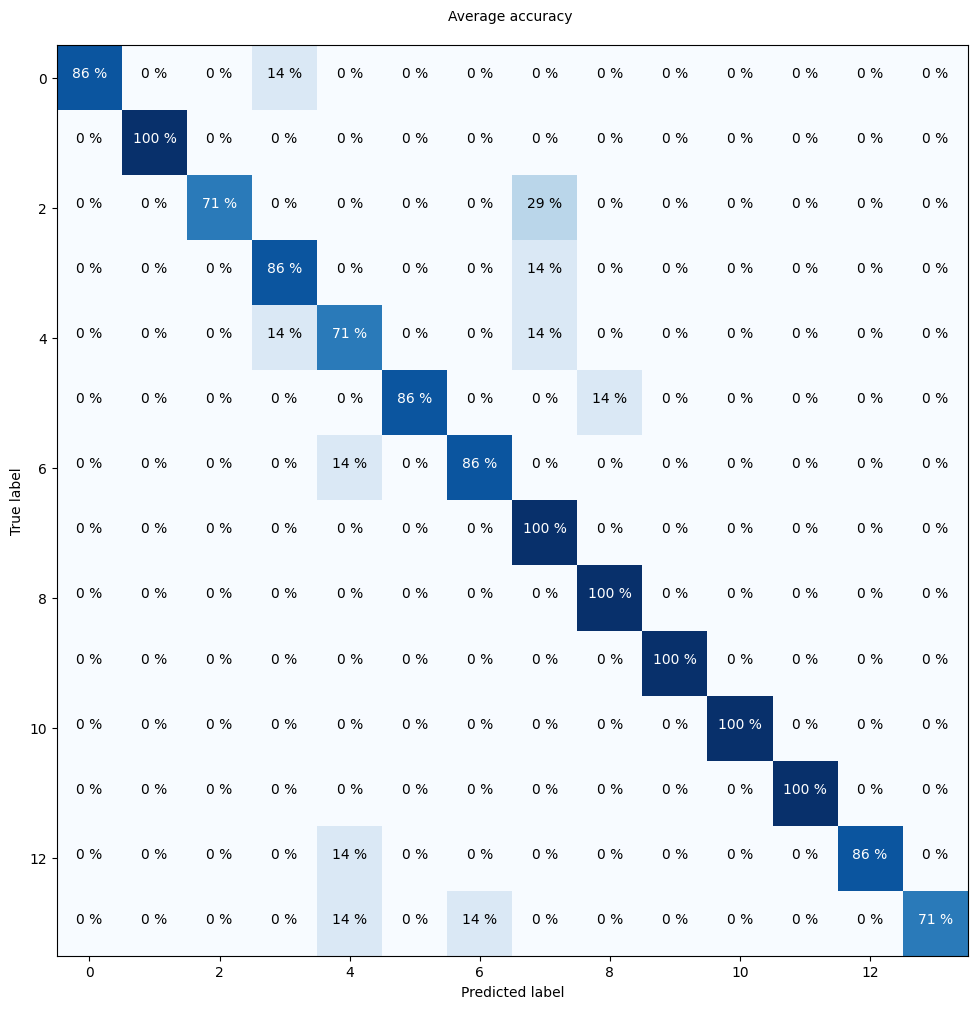

In [12]:
plot_confusion_matrix(y_test=y_test_labels,y_pred=y_pred,tick_size=10,title_size=10,axis_label_size=10, figsize=(15,10))

#### InceptionV3

In [13]:
inceptionv3_model = InceptionV3(include_top=False,input_shape=(224,224,3),pooling='avg')
# inceptionv3_model.load_weights(f"{weights_models_dir}/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5")
x = inceptionv3_model.layers[-1].output
prediction_inceptionv3=Dense(14, activation='softmax',name='output2')(x)
inceptionv3_model = Model(inputs=inceptionv3_model.input, outputs=prediction_inceptionv3,name='inceptionv3')
lr=0.0001
inceptionv3_model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
inceptionv3_model.load_weights('weights/inceptionv3.h5')
# inceptionv3_model.load_weights('weights/inceptionv3.weights.h5')

In [15]:
loss, acc = inceptionv3_model.evaluate(test_image_gen)
print('Test Loss:', loss)
print('Test Accuracy:', acc)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 415ms/step - accuracy: 0.9463 - loss: 0.1379
Test Loss: 0.1591389775276184
Test Accuracy: 0.9489796161651611


In [16]:
probability = inceptionv3_model.predict(test_image_gen)
y_pred = np.argmax(probability, axis=1)
y_test_labels = test_image_gen.classes



4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step  


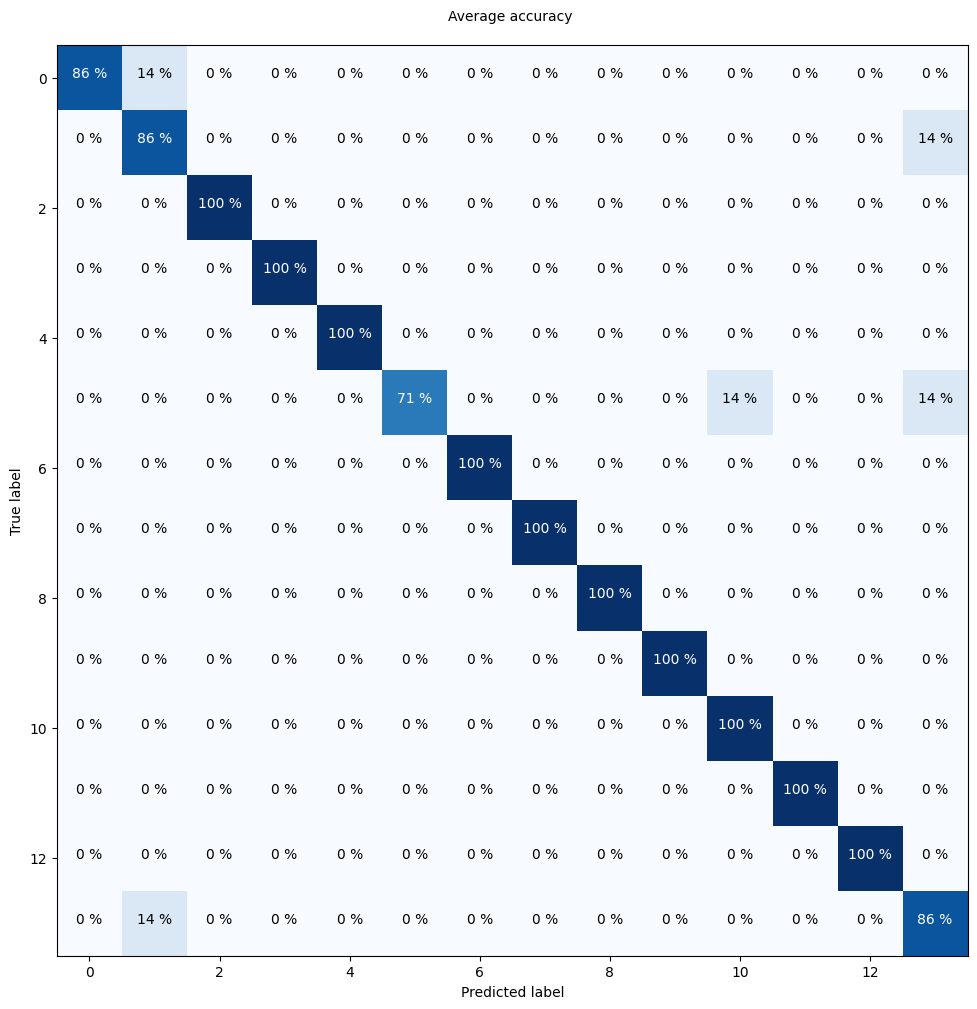

In [17]:
plot_confusion_matrix(y_test=y_test_labels,y_pred=y_pred,tick_size=10,title_size=10,axis_label_size=10, figsize=(15,10))